<a href="https://colab.research.google.com/github/Folasewa/Personal_ML_Projects/blob/main/Gapminder_Classwork_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Explore and visualize Gapminder dataset. The dataset indicators such as GDP per capita, life expectancy, and population size, broken down by country and year.
Your task is to check global development trends over time, using data related to health, wealth, and demographics, and illustrate relationships between economic development, public health, and demographic patterns.
Try to tell a story using the following figures:
1.	Show the connection between GDP per capita and Life Expectancy, color by continent (scatter)
2.	Show the correlations between GDP per capita, life expectancy, and population size interactively. Color by continent. Bonus: Hovering will show detailed information for each country. (3D scatter)
3.	Explore distribution and variation of life expectancy across continents (box plot)
4.	What is the degree of correlation among the Gapminder indicators? (heatmap)
5.	Identify development trends over time (e.g., economic and health (Life Exp.) improvements).
6.	Add interesting insights of your own 😊


In [2]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Load the Gapminder dataset
url = "https://raw.githubusercontent.com/resbaz/r-novice-gapminder-files/master/data/gapminder-FiveYearData.csv"
df = pd.read_csv(url)

In [3]:
df.head(5)

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [4]:
df.describe()

,year,pop,lifeExp,gdpPercap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165876
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846988
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


In [5]:
df.isnull().sum()

,0
country,0
year,0
pop,0
continent,0
lifeExp,0
gdpPercap,0


<Axes: xlabel='gdpPercap', ylabel='lifeExp'>

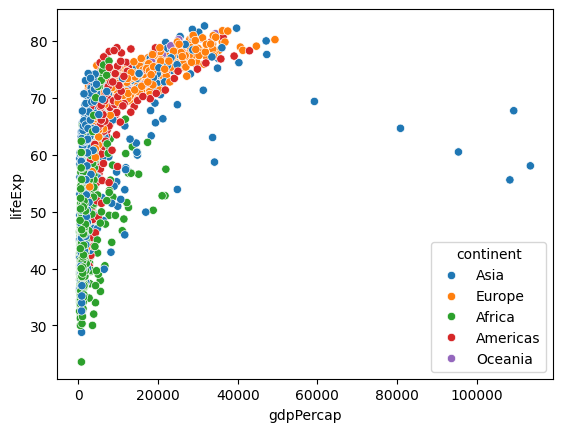

In [6]:
#@title Connection between GDP per Capita and Life Expectancy, colors by continent


sns.scatterplot(x = df['gdpPercap'], y= df['lifeExp'], hue = df['continent'])

In [7]:
#@title 3D Scatter plot of GDP per Capita, Life Expectancy, population size, color by continent
fig = px.scatter_3d(df, x = 'gdpPercap', y = 'lifeExp', z = 'pop', color = 'continent', hover_data = 'country', title="3D Scatter Plot of GDP per Capita, Life Expectancy, and Population Size")

fig.show()

<ipython-input-8-e493f4c5abad>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='lifeExp', ylabel='continent'>

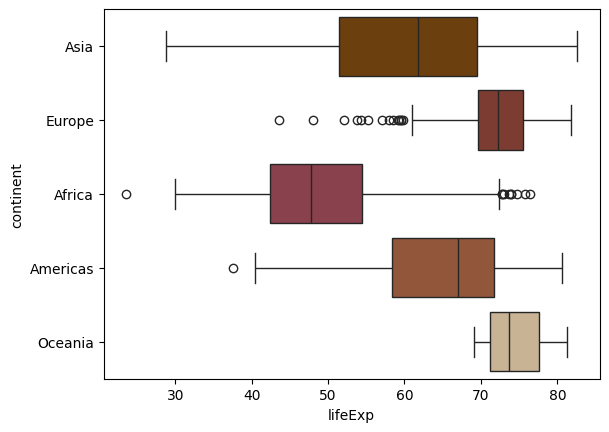

In [8]:
#@title Explore Distribution and variation of life expectancy across continents (box plot)
colors = ['#7B3F00', '#8A3324', '#953545', '#A0522D', '#D2B48C']
sns.boxplot(x = df['lifeExp'], y= df['continent'], palette = colors)

<Axes: title={'center': 'Degree of correlation among the Gapminder indicators'}>

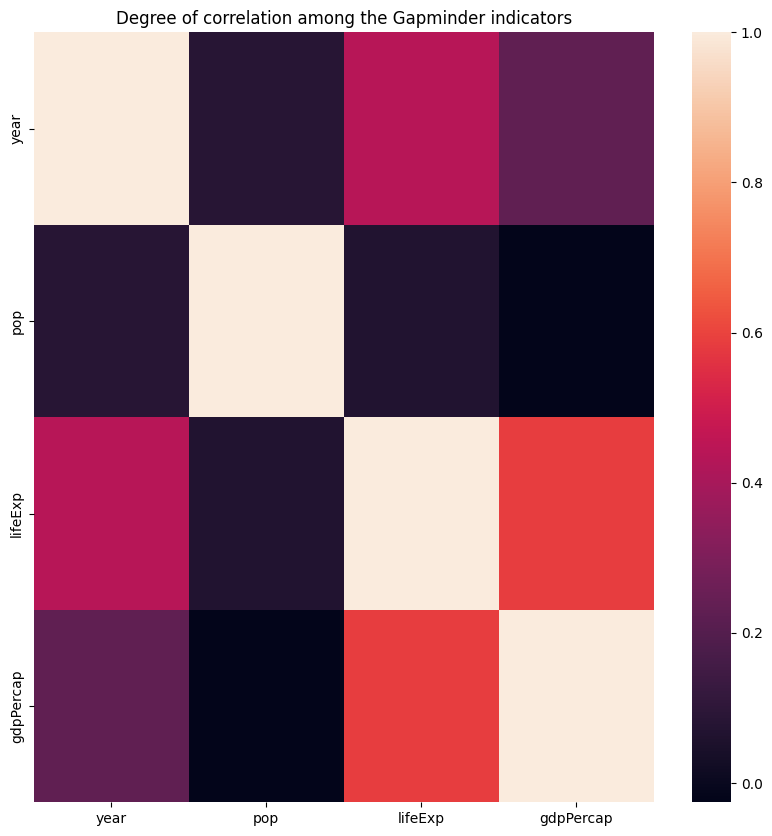

In [10]:
#@title Degree of correlation among the Gapminder indicators?
fig = plt.figure(figsize = (10,10))
plt.title("Degree of correlation among the Gapminder indicators")
sns.heatmap(df.corr(numeric_only = True))


In [11]:
#@title Development Trends over time (e.g., economic and health (Life Exp.) improvements)
# Aggregate data by continent
df_grouped = df.groupby(['year', 'continent']).agg({'lifeExp': 'mean'}).reset_index()

fig = px.line(
    df_grouped,
    x='year',
    y='lifeExp',
    color='continent',
    title='Development Trends Over Time (Average Life Expectancy by Continent)'
)
fig.show()

In [16]:
#@title Development Trends over Time (Total Population by Continent)
df_grouped1 = df.groupby(['year', 'continent']).agg({'pop': 'sum'}).reset_index()

fig = px.line(
    df_grouped1,
    x='year',
    y='pop',
    color='continent',
    line_dash = 'continent',
    title='Development Trends Over Time (Total Population by Continent)'
)
fig.show()


In [18]:
#@title Population of Countries within a Continent
df_grouped2 = df.groupby(['country', 'continent']).agg({'pop': 'sum'}).reset_index()

fig = px.bar(df_grouped2, x = 'country', y = 'pop',
             color = 'continent', title = 'Population of Countries within a Continent',
             labels = {'pop': 'Population', 'country': 'Country'}, hover_name = 'country')

#Update layout for better visibility
fig.update_layout(
    xaxis={'categoryorder': 'total descending'},  # Order by population descending
    showlegend=True
)

fig.show()

In [19]:
#@title GDP Per Country
df_grouped3 = df.groupby(['country', 'continent']).agg({'gdpPercap' : 'sum'}).reset_index()
fig = px.bar(df_grouped3, x = 'country', y = 'gdpPercap', color = 'continent',
             title = 'GDP Per Country', labels = {'country': 'Country', 'gdpPercap': 'GDP Per Capita'}, hover_name = 'country')

#Update layout for better visibility
fig.update_layout(
    xaxis={'categoryorder': 'total descending'},
    showlegend=True
)

fig.show()



In [27]:
# Merge the population and GDP data to compare
df_population = df.groupby(['country', 'continent']).agg({'pop': 'sum'}).reset_index()
df_gdp = df.groupby(['country', 'continent']).agg({'gdpPercap': 'mean'}).reset_index()

# Merge both datasets
df_combined = pd.merge(df_population, df_gdp, on=['country', 'continent'])

# Create the scatter plot
fig = px.scatter(
    df_combined,
    x='pop',
    y='gdpPercap',
    color='continent',
    hover_name='country',
    title='Population vs. GDP Per Capita',
    labels={'pop': 'Population', 'gdpPercap': 'GDP Per Capita'}
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title="Population",
    yaxis_title="GDP Per Capita",
    showlegend=True
)

fig.show()




In [26]:
#@title GDP Per Capita by Country within Continent
df_population = df.groupby(['country', 'continent']).agg({'pop': 'sum'}).reset_index()
df_gdp = df.groupby(['country', 'continent']).agg({'gdpPercap': 'mean'}).reset_index()

# Combine the datasets
df_combined = pd.merge(df_population, df_gdp, on=['country', 'continent'])

# Create the bar chart
fig = px.bar(
    df_combined,
    x='country',
    y='gdpPercap',  # GDP per capita on the y-axis
    color='pop',  # Use population to color the bars
    facet_col='continent',  # Create subplots for each continent
    title='GDP Per Capita by Country within Continent (Colored by Population)',
    labels={'gdpPercap': 'GDP Per Capita', 'pop': 'Population', 'country': 'Country'}
)
# Update bar width
fig.update_traces(width=0.6)  # Adjust the bar width (default is 0.2; increase for thicker bars)


# Update layout for better readability
fig.update_layout(
    xaxis_tickangle=45,  # Rotate country names for better visibility
    yaxis_title='GDP Per Capita',
    coloraxis_colorbar_title='Population'
)

fig.show()

